In [82]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

##### Loading data and spliting into test and train

In [83]:
data = pd.read_excel('Concrete_Data.xls')
split_ind = int(0.7 * len(data))
data_list = data.values.tolist()

# shuffle data
random.seed(42)
random.shuffle(data_list)
train_data = data_list[:split_ind]
test_data = data_list[split_ind:]
x = np.array([i[:-1] for i in train_data])
# preprocessing train data
mini=np.min(x,axis=0)
maxi=np.max(x,axis=0)
x=(x-mini)/(maxi-mini)
mean=np.mean(x,axis=0)
std=np.std(x,axis=0)
x=(x-mean)/(std)

print(x)

d = np.array([i[-1] for i in train_data])
x_test = np.array([i[:-1] for i in test_data])
# preprocessing test data
mini=np.min(x_test,axis=0)
maxi=np.max(x_test,axis=0)
x_test=(x_test-mini)/(maxi-mini)
mean=np.mean(x_test,axis=0)
std=np.std(x_test,axis=0)
x_test=(x_test-mean)/(std)

d_test = np.array([i[-1] for i in test_data])

[[ 2.49668933e+00 -8.49763952e-01 -8.68511837e-01 ...  1.99072811e+00
  -2.01641985e+00 -6.17651935e-01]
 [-2.71556176e-01 -8.49763952e-01  6.77708193e-01 ...  2.15366445e-01
   1.43232594e+00 -5.04542744e-01]
 [ 3.09535784e-01  8.22656079e-01 -8.68511837e-01 ...  3.69824462e-01
   5.97534787e-01 -2.78324361e-01]
 ...
 [ 2.83555517e-01 -8.49763952e-01 -8.68511837e-01 ... -1.44397220e-03
   9.52392873e-01 -6.82285759e-01]
 [ 1.39012242e+00  3.78834868e-01 -8.68511837e-01 ... -1.53955606e+00
   1.40846048e+00 -6.17651935e-01]
 [-1.33973002e+00  1.60049898e+00 -8.68511837e-01 ...  8.90497370e-03
  -3.23346936e-01 -6.17651935e-01]]


##### Tanh Activation Function

In [84]:
# tanh activation function
def tanh(x):
    return np.tanh(x)

# derivative of tanh activation function
def tanh_deriv(x):
    return 1.0 - np.tanh(x)**2

##### Leaky Relu Activation Function

In [85]:
# leaky relu activation function
def leaky_relu(x):
    return np.where(x>=0, x, 0.01*x)
    
# derivative of leaky relu activation function
def leaky_relu_deriv(x):
    return np.where(x>=0, 1, 0.01)

##### Loss Function

In [86]:
# divergence function
def divergence(y, d):
    return (y - d)**2
# derivative of divergence function
def divergence_deriv(y, d):
    return 2 * (y - d)
# Loss function
def MSE(y, d):
    return np.mean(np.subtract(y, d)**2)

#### Backpropagation

In [87]:
def back_prop(hidden_layers, activation_func):
    learning_rate = 0.001
    epochs = 1000
    # weights initialization
    np.random.seed(42)
    w1 = np.random.uniform(-1, 1, (8, hidden_layers))
    w2 = np.random.uniform(-1, 1, (hidden_layers, 1))

    lowest_mse_train = 100000
    lowest_mse_test = 100000

    train_loss = []
    test_loss = []
    epochs_list = []

    for i in range(epochs):
        y_pred = []
        loss_derv1 = 0
        loss_derv2 = 0
        for j in range(len(x)):
        # forward pass
            # first layer
            z1 = np.dot(x[j], w1)
            if(activation_func == 'tanh'):
                y1 = tanh(z1)
            elif(activation_func == 'leaky_relu'):
                y1 = leaky_relu(z1)
            # second layer
            z2 = np.dot(y1, w2)
            y2 = z2
            y_pred.append(y2[0])
        # backward pass
            # second layer
            delta2 = divergence_deriv(y2[0], d[j])
            delta3 = np.dot(y1.reshape(-1,1), delta2.reshape(1, -1))
            loss_derv2 += delta3
            # first layer
            if(activation_func == 'tanh'):
                delta4 = np.dot(delta2, w2.T) * tanh_deriv(z1)
            elif(activation_func == 'leaky_relu'):
                delta4 = np.dot(delta2, w2.T) * leaky_relu_deriv(z1)
            delta5 = np.dot(x[j].reshape(-1,1), delta4.reshape(1, -1))
            loss_derv1 += delta5
        
        loss = MSE(y_pred, d)
        if loss < lowest_mse_train:
            lowest_mse_train = loss
        train_loss.append(loss)
        epochs_list.append(i+1)
        w1 -= learning_rate * loss_derv1/len(x)
        w2 -= learning_rate * loss_derv2/len(x)
        # testing
        y_pred_test = []
        for j in range(len(x_test)):
            # first layer
            z1 = np.dot(x_test[j], w1)
            y1 = tanh(z1)
            # second layer
            z2 = np.dot(y1, w2)
            y2 = z2
            y_pred_test.append(y2[0])
        loss_test = MSE(y_pred_test, d_test)
        if loss_test < lowest_mse_test:
            lowest_mse_test = loss_test
        test_loss.append(loss_test)
        print("Epoch: ", i+1, "Loss: ", loss)

    print("Lowest MSE on training set: ", lowest_mse_train)
    print("Lowest MSE on testing set: ", lowest_mse_test)
    plt.plot(epochs_list, train_loss, label='Training loss')
    plt.plot(epochs_list, test_loss, label='Testing loss')
    plt.legend()
    plt.show()

Tanh activation function
Hidden layers: 25
Epoch:  1 Loss:  1574.7992710597748
Epoch:  2 Loss:  1572.590248603012
Epoch:  3 Loss:  1570.412205647296
Epoch:  4 Loss:  1568.2643108953944
Epoch:  5 Loss:  1566.1457142161642
Epoch:  6 Loss:  1564.0555655370401
Epoch:  7 Loss:  1561.9930281796524
Epoch:  8 Loss:  1559.957287675143
Epoch:  9 Loss:  1557.9475570897612
Epoch:  10 Loss:  1555.9630797291588
Epoch:  11 Loss:  1554.003129865139
Epoch:  12 Loss:  1552.0670119117747
Epoch:  13 Loss:  1550.1540583141411
Epoch:  14 Loss:  1548.2636263239606
Epoch:  15 Loss:  1546.3950938227083
Epoch:  16 Loss:  1544.5478543976742
Epoch:  17 Loss:  1542.7213119522664
Epoch:  18 Loss:  1540.9148752061296
Epoch:  19 Loss:  1539.1279524844838
Epoch:  20 Loss:  1537.3599471904315
Epoch:  21 Loss:  1535.6102542938802
Epoch:  22 Loss:  1533.8782580653635
Epoch:  23 Loss:  1532.1633311519347
Epoch:  24 Loss:  1530.4648349592294
Epoch:  25 Loss:  1528.7821211900398
Epoch:  26 Loss:  1527.1145343097753
Epoch:  

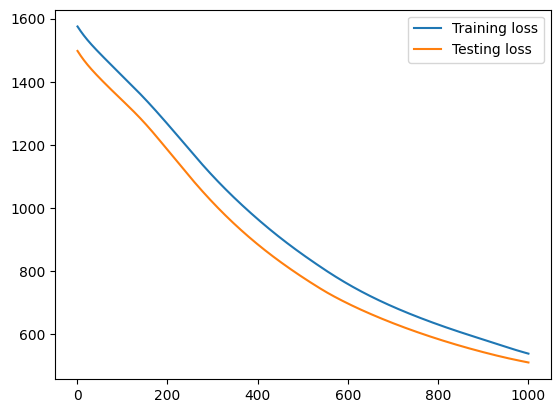

Tanh activation function
Hidden layers: 50
Epoch:  1 Loss:  1560.6629898271558
Epoch:  2 Loss:  1556.1847715008328
Epoch:  3 Loss:  1551.8121540568948
Epoch:  4 Loss:  1547.5408411743572
Epoch:  5 Loss:  1543.3667954364082
Epoch:  6 Loss:  1539.286201214464
Epoch:  7 Loss:  1535.2954334026629
Epoch:  8 Loss:  1531.391032324208
Epoch:  9 Loss:  1527.569684532812
Epoch:  10 Loss:  1523.8282088356298
Epoch:  11 Loss:  1520.1635466551365
Epoch:  12 Loss:  1516.572755786698
Epoch:  13 Loss:  1513.053006648037
Epoch:  14 Loss:  1509.6015802127995
Epoch:  15 Loss:  1506.2158669402097
Epoch:  16 Loss:  1502.8933661356405
Epoch:  17 Loss:  1499.6316852925206
Epoch:  18 Loss:  1496.4285390710909
Epoch:  19 Loss:  1493.2817476650787
Epoch:  20 Loss:  1490.1892343955485
Epoch:  21 Loss:  1487.1490224537913
Epoch:  22 Loss:  1484.1592307922679
Epoch:  23 Loss:  1481.218069232707
Epoch:  24 Loss:  1478.3238329204037
Epoch:  25 Loss:  1475.4748962999342
Epoch:  26 Loss:  1472.6697068167234
Epoch:  27

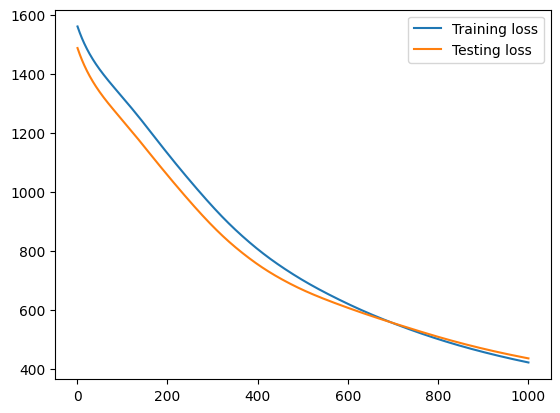

leaky relu activation function
Hidden layers: 25
Epoch:  1 Loss:  1708.874875683872
Epoch:  2 Loss:  1629.9332277935418
Epoch:  3 Loss:  1556.2547626678888
Epoch:  4 Loss:  1486.961046591487
Epoch:  5 Loss:  1421.3383272333886
Epoch:  6 Loss:  1358.805021500247
Epoch:  7 Loss:  1298.962194020631
Epoch:  8 Loss:  1241.4981162097902
Epoch:  9 Loss:  1186.1638249797077
Epoch:  10 Loss:  1132.7815194555126
Epoch:  11 Loss:  1081.2571228360944
Epoch:  12 Loss:  1031.5346805654926
Epoch:  13 Loss:  983.5786869458224
Epoch:  14 Loss:  937.4210863413022
Epoch:  15 Loss:  893.0763972454256
Epoch:  16 Loss:  850.5584959957441
Epoch:  17 Loss:  809.8898474852394
Epoch:  18 Loss:  771.10961928282
Epoch:  19 Loss:  734.2430797413165
Epoch:  20 Loss:  699.3011061849926
Epoch:  21 Loss:  666.2914660398957
Epoch:  22 Loss:  635.2136614166863
Epoch:  23 Loss:  606.0794105825925
Epoch:  24 Loss:  578.8605082392282
Epoch:  25 Loss:  553.5072883257764
Epoch:  26 Loss:  529.94443043697
Epoch:  27 Loss:  50

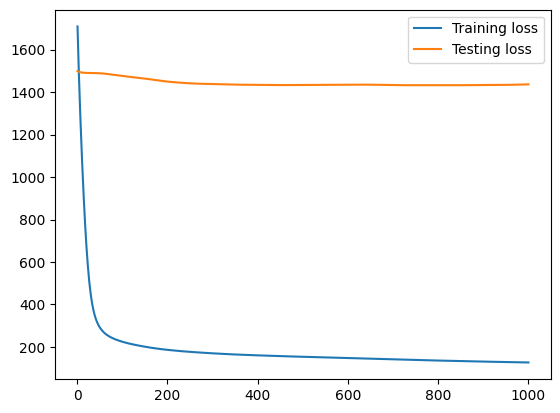

leaky relu activation function
Hidden layers: 50
Epoch:  1 Loss:  1557.9061201639518
Epoch:  2 Loss:  1413.2159873591274
Epoch:  3 Loss:  1285.2691813573272
Epoch:  4 Loss:  1171.4311827058857
Epoch:  5 Loss:  1069.6960126480649
Epoch:  6 Loss:  978.5420236890458
Epoch:  7 Loss:  896.7311268408339
Epoch:  8 Loss:  823.2774136983389
Epoch:  9 Loss:  757.371898694296
Epoch:  10 Loss:  698.3340458418255
Epoch:  11 Loss:  645.5312888929104
Epoch:  12 Loss:  598.3729760295166
Epoch:  13 Loss:  556.3705714195274
Epoch:  14 Loss:  519.0473334598412
Epoch:  15 Loss:  485.97125352547124
Epoch:  16 Loss:  456.7517709468296
Epoch:  17 Loss:  431.0065973609597
Epoch:  18 Loss:  408.37813558565205
Epoch:  19 Loss:  388.53685355956804
Epoch:  20 Loss:  371.1695153041854
Epoch:  21 Loss:  355.99823334383814
Epoch:  22 Loss:  342.75848738277284
Epoch:  23 Loss:  331.2157110731143
Epoch:  24 Loss:  321.1433092656765
Epoch:  25 Loss:  312.364752182865
Epoch:  26 Loss:  304.70358304875447
Epoch:  27 Loss

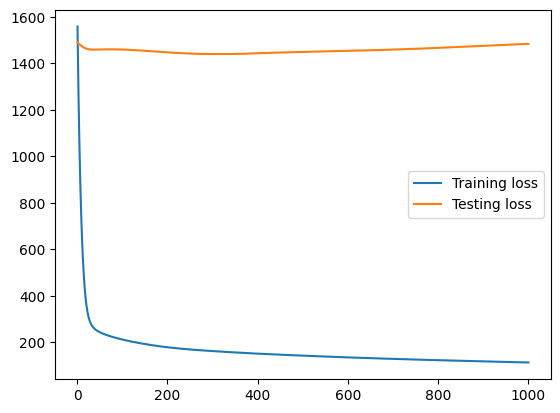

In [88]:
import time
back_prop(25, 'tanh')
print("Tanh activation function")
print("Hidden layers: 50")
back_prop(50, 'tanh')
print("leaky relu activation function")
print("Hidden layers: 25")
back_prop(25, 'leaky_relu')
print("leaky relu activation function")
print("Hidden layers: 50")
back_prop(50, 'leaky_relu')

##### R Prop

In [89]:
def R_prop(hidden_layers,activation_func):
    learning_rate1 = np.full((8, hidden_layers), 0.001)
    learning_rate2 = np.full((hidden_layers, 1), 0.001)

    epochs = 1000
    alpha = 1.2
    beta = 0.5
    # weights initialization
    np.random.seed(42)
    w1 = np.random.uniform(-1, 1, (8, hidden_layers))
    w2 = np.random.uniform(-1, 1, (hidden_layers, 1))

    lowest_mse_train = 100000
    lowest_mse_test = 100000

    train_loss = []
    test_loss = []
    epochs_list = []

    prev_loss_derv1 = np.random.uniform(-1, 1, (8, hidden_layers))
    prev_loss_derv2= np.random.uniform(-1, 1, (hidden_layers, 1))

    for i in range(epochs):
        y_pred = []
        loss_derv1 = 0
        loss_derv2 = 0
        for j in range(len(x)):
            
            # forward pass

            # first layer
            z1 = np.dot(x[j], w1)
            if(activation_func == 'tanh'):
                y1 = tanh(z1)
            elif(activation_func == 'leaky_relu'):
                y1 = leaky_relu(z1)
            # second layer
            z2 = np.dot(y1, w2)
            y2 = z2
            y_pred.append(y2[0])

            # backward pass

            # second layer
            delta2 = divergence_deriv(y2[0], d[j])
            delta3 = np.dot(y1.reshape(-1,1), delta2.reshape(1, -1))
            loss_derv2 += delta3
            # first layer
            if(activation_func == 'tanh'):
                delta4 = np.dot(delta2, w2.T) * tanh_deriv(z1)
            elif(activation_func == 'leaky_relu'):
                delta4 = np.dot(delta2, w2.T) * leaky_relu_deriv(z1)
            delta5 = np.dot(x[j].reshape(-1,1), delta4.reshape(1, -1))
            loss_derv1 += delta5
        
        loss = MSE(y_pred, d)
        if loss < lowest_mse_train:
            lowest_mse_train = loss
        train_loss.append(loss)
        epochs_list.append(i+1)

        if(i==0):
            for(k, l) in zip(range(8), range(hidden_layers)):
                w1[k][l] -= learning_rate1[k][l]*loss_derv1[k][l]/len(x)
            for(k, l) in zip(range(hidden_layers), range(1)):
                w2[k][l] -= learning_rate2[k][l]*loss_derv2[k][l]/len(x)

        if(i!=0):
            for(k, l) in zip(range(8), range(hidden_layers)):
                if(loss_derv1[k][l]*prev_loss_derv1[k][l] > 0):
                    learning_rate1[k][l] = learning_rate1[k][l]*alpha
                    w1[k][l] -= (learning_rate1[k][l]*loss_derv1[k][l])/len(x)
                elif(loss_derv1[k][l]*prev_loss_derv1[k][l] < 0):
                    w1[k][l] += (learning_rate1[k][l]*prev_loss_derv1[k][l])/len(x)
                    learning_rate1[k][l] = learning_rate1[k][l]*beta
                else:
                    w1[k][l] -= learning_rate1[k][l]*loss_derv1[k][l]/len(x)

                    

        if(i!=0):
            for(k, l) in zip(range(hidden_layers), range(1)):
                if(loss_derv2[k][l]*prev_loss_derv2[k][l] > 0):
                    learning_rate2[k][l] = learning_rate2[k][l]*alpha
                    w2[k][l] -= (learning_rate2[k][l]*loss_derv2[k][l])/len(x)
                elif(loss_derv2[k][l]*prev_loss_derv2[k][l] < 0):
                    w2[k][l] += (learning_rate2[k][l]*prev_loss_derv2[k][l])/len(x)
                    learning_rate2[k][l] = learning_rate2[k][l]*beta
                else:
                    w2[k][l] -= learning_rate2[k][l]*loss_derv2[k][l]/len(x)
        
        prev_loss_derv1 = loss_derv1
        prev_loss_derv2 = loss_derv2
                    
        # testing
        y_pred_test = []
        for j in range(len(x_test)):
            # first layer
            z1 = np.dot(x_test[j], w1)
            y1 = tanh(z1)
            # second layer
            z2 = np.dot(y1, w2)
            y2 = z2
            y_pred_test.append(y2[0])
        loss_test = MSE(y_pred_test, d_test)
        if loss_test < lowest_mse_test:
            lowest_mse_test = loss_test
        test_loss.append(loss_test)
        print("Epoch: ", i, "Loss: ", loss)

    print("Lowest MSE on training set: ", lowest_mse_train)
    print("Lowest MSE on testing set: ", lowest_mse_test)
    plt.plot(epochs_list, train_loss, label='Training loss')
    plt.plot(epochs_list, test_loss, label='Testing loss')
    plt.legend()
    plt.show()

Tanh activation function
Hidden layers: 25
Epoch:  0 Loss:  1574.7992710597748
Epoch:  1 Loss:  1574.6307789415823
Epoch:  2 Loss:  1574.4297037795156
Epoch:  3 Loss:  1574.1899998844085
Epoch:  4 Loss:  1573.90460563563
Epoch:  5 Loss:  1573.5653155996076
Epoch:  6 Loss:  1573.16265365259
Epoch:  7 Loss:  1572.6857547570773
Epoch:  8 Loss:  1572.1222652639728
Epoch:  9 Loss:  1571.4582731536307
Epoch:  10 Loss:  1570.6782791770481
Epoch:  11 Loss:  1569.7652151135594
Epoch:  12 Loss:  1568.7005648984423
Epoch:  13 Loss:  1567.464892530993
Epoch:  14 Loss:  1566.038107437787
Epoch:  15 Loss:  1564.3997648724583
Epoch:  16 Loss:  1562.5292930726691
Epoch:  17 Loss:  1560.4059522081168
Epoch:  18 Loss:  1558.0087567408725
Epoch:  19 Loss:  1555.3173655939793
Epoch:  20 Loss:  1552.3156350436873
Epoch:  21 Loss:  1548.998987846383
Epoch:  22 Loss:  1545.3851969892376
Epoch:  23 Loss:  1541.5296698282557
Epoch:  24 Loss:  1537.5498415922107
Epoch:  25 Loss:  1533.6386518400443
Epoch:  26 L

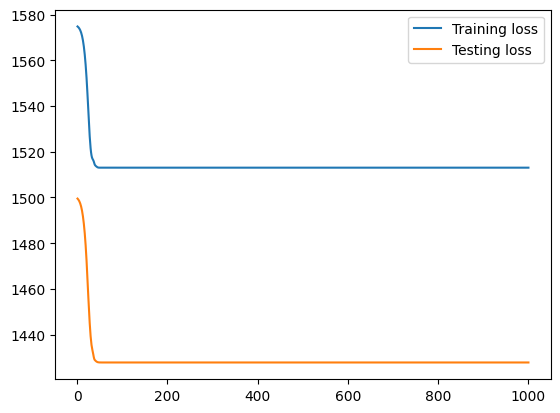

Tanh activation function
Hidden layers: 50
Epoch:  0 Loss:  1560.6629898271558
Epoch:  1 Loss:  1560.5115475552332
Epoch:  2 Loss:  1560.3278010181136
Epoch:  3 Loss:  1560.1044391954213
Epoch:  4 Loss:  1559.8323594946246
Epoch:  5 Loss:  1559.500215314188
Epoch:  6 Loss:  1559.0938856102987
Epoch:  7 Loss:  1558.5959071260063
Epoch:  8 Loss:  1557.9849768989588
Epoch:  9 Loss:  1557.235730904408
Epoch:  10 Loss:  1556.3190721270641
Epoch:  11 Loss:  1555.2031606467217
Epoch:  12 Loss:  1553.854533975691
Epoch:  13 Loss:  1552.238012488595
Epoch:  14 Loss:  1550.3146665874935
Epoch:  15 Loss:  1548.03991046428
Epoch:  16 Loss:  1545.3634076311605
Epoch:  17 Loss:  1542.224393954178
Epoch:  18 Loss:  1538.536752074459
Epoch:  19 Loss:  1534.170433922602
Epoch:  20 Loss:  1528.9204828618242
Epoch:  21 Loss:  1522.4038741128848
Epoch:  22 Loss:  1514.2603024637945
Epoch:  23 Loss:  1505.552098775939
Epoch:  24 Loss:  1497.6299025295477
Epoch:  25 Loss:  1490.476922642484
Epoch:  26 Loss:

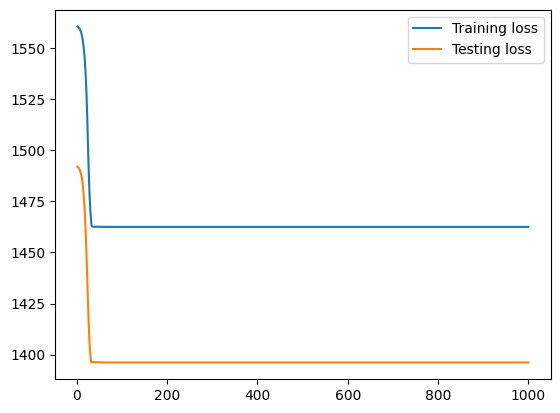

leaky relu activation function
Hidden layers: 25
Epoch:  0 Loss:  1708.874875683872
Epoch:  1 Loss:  1707.289567608636
Epoch:  2 Loss:  1705.3918398935193
Epoch:  3 Loss:  1703.1229722980916
Epoch:  4 Loss:  1700.415856123287
Epoch:  5 Loss:  1697.1766608827954
Epoch:  6 Loss:  1693.2628846191624
Epoch:  7 Loss:  1688.535622657548
Epoch:  8 Loss:  1682.7944677140772
Epoch:  9 Loss:  1675.7346374716765
Epoch:  10 Loss:  1666.6644325838993
Epoch:  11 Loss:  1654.673823687427
Epoch:  12 Loss:  1638.292900056837
Epoch:  13 Loss:  1614.8594480508796
Epoch:  14 Loss:  1580.073629128609
Epoch:  15 Loss:  1527.1272256912807
Epoch:  16 Loss:  1455.5911167821203
Epoch:  17 Loss:  1384.166909616246
Epoch:  18 Loss:  1346.3435892816672
Epoch:  19 Loss:  1330.924106964518
Epoch:  20 Loss:  1313.6774045986979
Epoch:  21 Loss:  1293.5709231030146
Epoch:  22 Loss:  1269.9879093630432
Epoch:  23 Loss:  1242.7603909297457
Epoch:  24 Loss:  1211.271134858827
Epoch:  25 Loss:  1175.2687264608041
Epoch:  2

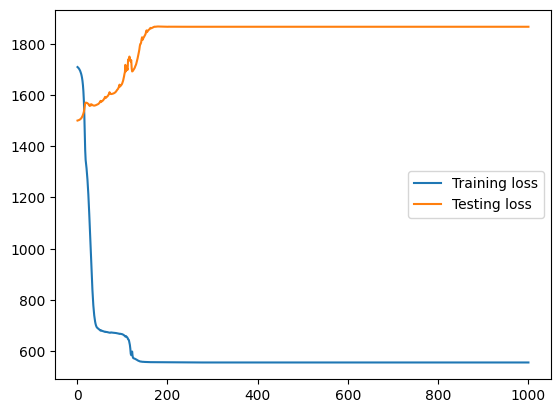

leaky relu activation function
Hidden layers: 50
Epoch:  0 Loss:  1557.9061201639518
Epoch:  1 Loss:  1552.4282308725476
Epoch:  2 Loss:  1545.9749410508446
Epoch:  3 Loss:  1538.3754305215705
Epoch:  4 Loss:  1529.4496220661997
Epoch:  5 Loss:  1519.0100110668973
Epoch:  6 Loss:  1506.8760546570038
Epoch:  7 Loss:  1492.8064144866091
Epoch:  8 Loss:  1476.483483543245
Epoch:  9 Loss:  1457.7068948938372
Epoch:  10 Loss:  1436.2739101013285
Epoch:  11 Loss:  1411.8749326126465
Epoch:  12 Loss:  1384.1169601279626
Epoch:  13 Loss:  1352.437994468832
Epoch:  14 Loss:  1314.8068618657246
Epoch:  15 Loss:  1266.7508251021043
Epoch:  16 Loss:  1196.705798328881
Epoch:  17 Loss:  1072.7945189170423
Epoch:  18 Loss:  898.751549649035
Epoch:  19 Loss:  777.0429632851076
Epoch:  20 Loss:  758.6829314469339
Epoch:  21 Loss:  750.7447636922815
Epoch:  22 Loss:  727.3645528059421
Epoch:  23 Loss:  703.0224752363376
Epoch:  24 Loss:  676.8291625974717
Epoch:  25 Loss:  648.4056093563894
Epoch:  26 

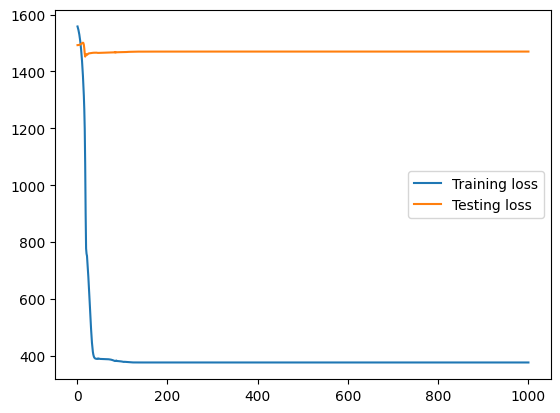

In [90]:
print("Tanh activation function")
print("Hidden layers: 25")
R_prop(25, 'tanh')
print("Tanh activation function")
print("Hidden layers: 50")
R_prop(50, 'tanh')
print("leaky relu activation function")
print("Hidden layers: 25")
R_prop(25, 'leaky_relu')
print("leaky relu activation function")
print("Hidden layers: 50")
R_prop(50, 'leaky_relu')

##### Quick Prop

In [101]:
def Q_prop(hidden_layers, activation_func):
    learning_rate = 0.001
    epochs = 1000
    # weights initialization
    np.random.seed(42)
    w1 = np.random.uniform(-1, 1, (8, hidden_layers))
    w2 = np.random.uniform(-1, 1, (hidden_layers, 1))

    prev_weight1 = np.zeros((8, hidden_layers))
    prev_weight2 = np.zeros((hidden_layers,1))

    prev_loss_derv1 = np.zeros((8, hidden_layers))
    prev_loss_derv2 = np.zeros((hidden_layers,1))
    
    lowest_mse_train = 100000
    lowest_mse_test = 100000

    weight1 = []
    weight2 = []
    weight1.append(w1)
    weight2.append(w2)
    train_loss = []
    test_loss = []
    epochs_list = []

    for i in range(epochs):
        y_pred = []
        loss_derv1 = 0
        loss_derv2 = 0
        for j in range(len(x)):
        # forward pass
            # first layer
            z1 = np.dot(x[j], w1)
            if(activation_func == 'tanh'):
                y1 = tanh(z1)
            elif(activation_func == 'leaky_relu'):
                y1 = leaky_relu(z1)
            # second layer
            z2 = np.dot(y1, w2)
            y2 = z2
            y_pred.append(y2[0])
        # backward pass
            # second layer
            delta2 = divergence_deriv(y2[0], d[j])
            delta3 = np.dot(y1.reshape(-1,1), delta2.reshape(1, -1))
            loss_derv2 += delta3
            # first layer
            if(activation_func == 'tanh'):
                delta4 = np.dot(delta2, w2.T) * tanh_deriv(z1)
            elif(activation_func == 'leaky_relu'):
                delta4 = np.dot(delta2, w2.T) * leaky_relu_deriv(z1)
            delta5 = np.dot(x[j].reshape(-1,1), delta4.reshape(1, -1))
            loss_derv1 += delta5
        
        loss = MSE(y_pred, d)
        if loss < lowest_mse_train:
            lowest_mse_train = loss
        train_loss.append(loss)
        epochs_list.append(i+1)

        if(i==0):
            w1 -= (learning_rate * loss_derv1)*np.abs(w1 - prev_weight1)/np.abs(loss_derv1 - prev_loss_derv1)
            w2 -= (learning_rate * loss_derv2)*np.abs(w2 - prev_weight2)/np.abs(loss_derv2 - prev_loss_derv2)
        else:
            w1 -= (learning_rate * loss_derv1)*np.abs(w1 - weight1[i-1])/np.abs(loss_derv1 - prev_loss_derv1)
            w2 -= (learning_rate * loss_derv2)*np.abs(w2 - weight2[i-1])/np.abs(loss_derv2 - prev_loss_derv2)

        weight1.append(w1)
        weight2.append(w2)

        prev_loss_derv1 = loss_derv1
        prev_loss_derv2 = loss_derv2
        # testing
        y_pred_test = []
        for j in range(len(x_test)):
            # first layer
            z1 = np.dot(x_test[j], w1)
            y1 = tanh(z1)
            # second layer
            z2 = np.dot(y1, w2)
            y2 = z2
            y_pred_test.append(y2[0])
        loss_test = MSE(y_pred_test, d_test)
        if loss_test < lowest_mse_test:
            lowest_mse_test = loss_test
        test_loss.append(loss_test)
        print("Epoch: ", i+1, "Loss: ", loss)

    print("Lowest MSE on training set: ", lowest_mse_train)
    print("Lowest MSE on testing set: ", lowest_mse_test)
    plt.plot(epochs_list, train_loss, label='Training loss')
    plt.plot(epochs_list, test_loss, label='Testing loss')
    plt.legend()
    plt.show()

In [ ]:
print("Tanh activation function")
print("Hidden layers: 25")
Q_prop(25, 'tanh')
print("Tanh activation function")
print("Hidden layers: 50")
Q_prop(50, 'tanh')
print("leaky relu activation function")
print("Hidden layers: 25")
Q_prop(25, 'leaky_relu')
print("leaky relu activation function")
print("Hidden layers: 50")
Q_prop(50, 'leaky_relu')

- lowest loss: backprop, tanh, 50 hidden units
- least time : backprop, tanh, 25 hidden units